<a href="https://colab.research.google.com/github/BaronVonBussin/Stuff/blob/main/Irisies_3Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

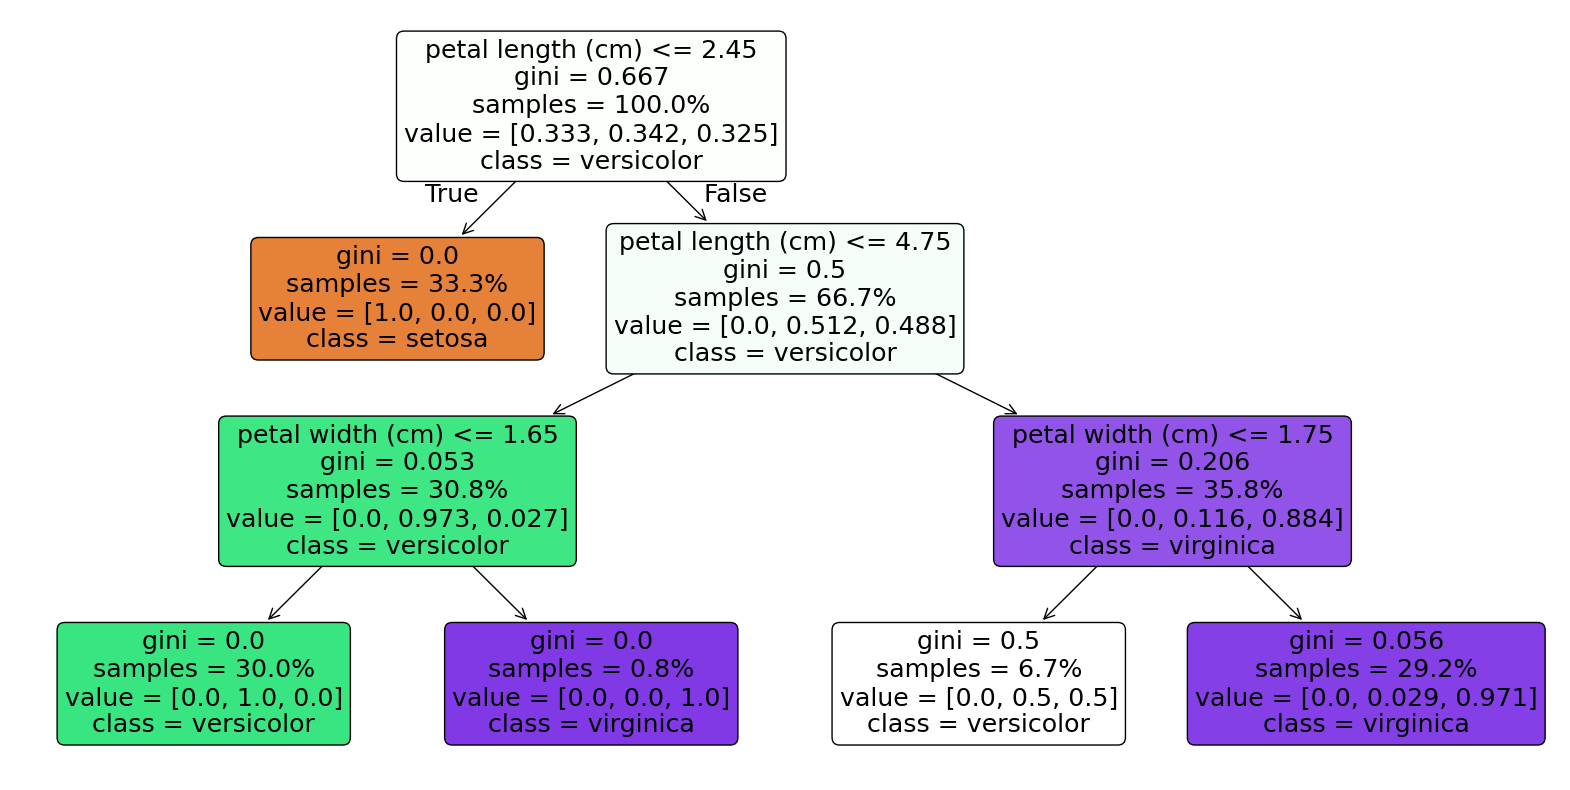


Feature Importances:
             feature  importance
2  petal length (cm)    0.934626
3   petal width (cm)    0.065374
0  sepal length (cm)    0.000000
1   sepal width (cm)    0.000000

Prediction for sample: versicolor


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the classic iris dataset - it's perfect for learning as it's small and interpretable
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split our data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train our decision tree
# max_depth=3 means our tree won't get too complex - making it easier to understand
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# Create a figure with a good size for visualization
plt.figure(figsize=(20,10))

# Plot the tree with feature names and class names
plot_tree(tree,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,  # Color boxes by majority class
          rounded=True, # Round the corners of boxes
          proportion=True)  # Show proportions instead of counts
plt.show()

# Let's also print the feature importances
importances = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': tree.feature_importances_
})
print("\nFeature Importances:")
print(importances.sort_values('importance', ascending=False))

# Make a prediction
sample = X_test.iloc[0].values.reshape(1, -1)
prediction = tree.predict(sample)
print(f"\nPrediction for sample: {iris.target_names[prediction[0]]}")

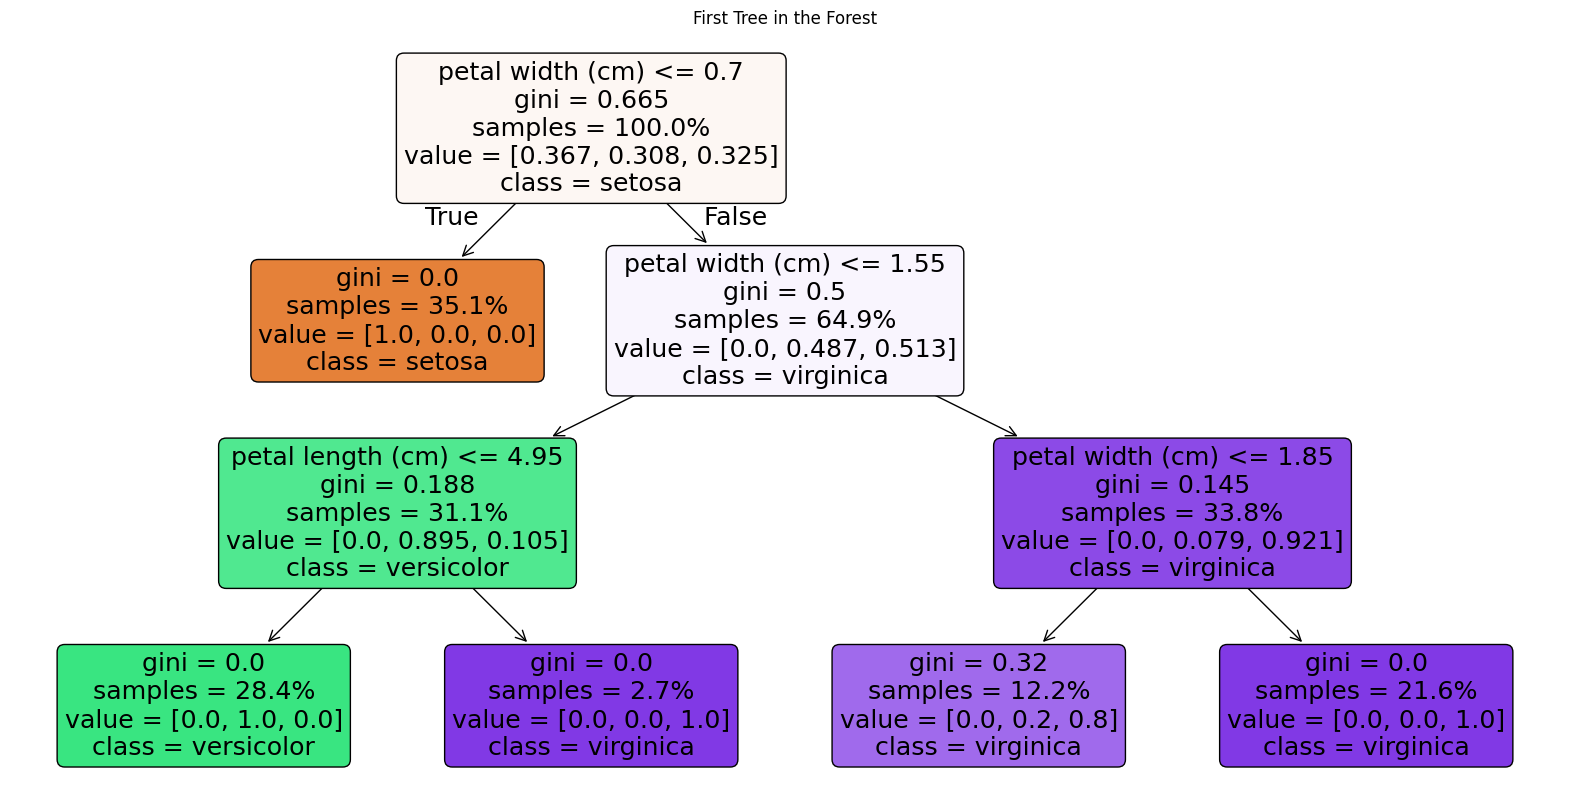


Feature Importances (averaged across all trees):
             feature  importance
2  petal length (cm)    0.448302
3   petal width (cm)    0.405093
0  sepal length (cm)    0.135158
1   sepal width (cm)    0.011446

Prediction for sample: versicolor

Individual tree predictions:
Tree 0: versicolor
Tree 1: versicolor
Tree 2: versicolor
Tree 3: versicolor
Tree 4: versicolor
Tree 5: versicolor
Tree 6: versicolor
Tree 7: versicolor
Tree 8: versicolor
Tree 9: versicolor

Prediction probabilities:
setosa: 0.000
versicolor: 0.967
virginica: 0.033

Performance Comparison:
Full Forest Score: 1.000
Average Individual Tree Score: 0.973
Best Individual Tree Score: 1.000
Worst Individual Tree Score: 0.933


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeCla

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and prepare our data just like before
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train our random forest
# n_estimators=10 means we'll have 10 trees in our forest
# We'll keep max_depth=3 to compare with our previous decision tree
forest = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)
forest.fit(X_train, y_train)

# Let's visualize one tree from our forest to see how it differs
plt.figure(figsize=(20,10))
plot_tree(forest.estimators_[0],  # Look at the first tree
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          proportion=True)
plt.title("First Tree in the Forest")
plt.show()

# Now let's analyze the feature importances across all trees
importances = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': forest.feature_importances_
})
print("\nFeature Importances (averaged across all trees):")
print(importances.sort_values('importance', ascending=False))

# Let's look at predictions and their confidence
sample = X_test.iloc[0].values.reshape(1, -1)
# Get predictions from all trees
tree_predictions = [tree.predict(sample)[0] for tree in forest.estimators_]
# Get the overall forest prediction
forest_prediction = forest.predict(sample)
# Get prediction probabilities for each class
prediction_probs = forest.predict_proba(sample)

print(f"\nPrediction for sample: {iris.target_names[forest_prediction[0]]}")
print("\nIndividual tree predictions:")
for i, pred in enumerate(tree_predictions):
    print(f"Tree {i}: {iris.target_names[int(pred)]}")
print("\nPrediction probabilities:")
for class_name, prob in zip(iris.target_names, prediction_probs[0]):
    print(f"{class_name}: {prob:.3f}")

# Let's compare the performance of individual trees vs the forest
print("\nPerformance Comparison:")
print(f"Full Forest Score: {forest.score(X_test, y_test):.3f}")
individual_scores = [tree.score(X_test, y_test) for tree in forest.estimators_]
print(f"Average Individual Tree Score: {np.mean(individual_scores):.3f}")
print(f"Best Individual Tree Score: {max(individual_scores):.3f}")
print(f"Worst Individual Tree Score: {min(individual_scores):.3f}")

[0]	train-mlogloss:0.97226	test-mlogloss:0.96390
[1]	train-mlogloss:0.86617	test-mlogloss:0.85092
[2]	train-mlogloss:0.77586	test-mlogloss:0.75482
[3]	train-mlogloss:0.69817	test-mlogloss:0.67222
[4]	train-mlogloss:0.63080	test-mlogloss:0.60110
[5]	train-mlogloss:0.57201	test-mlogloss:0.53860
[6]	train-mlogloss:0.51969	test-mlogloss:0.48355
[7]	train-mlogloss:0.47422	test-mlogloss:0.43566
[8]	train-mlogloss:0.43330	test-mlogloss:0.39311
[9]	train-mlogloss:0.39693	test-mlogloss:0.35538


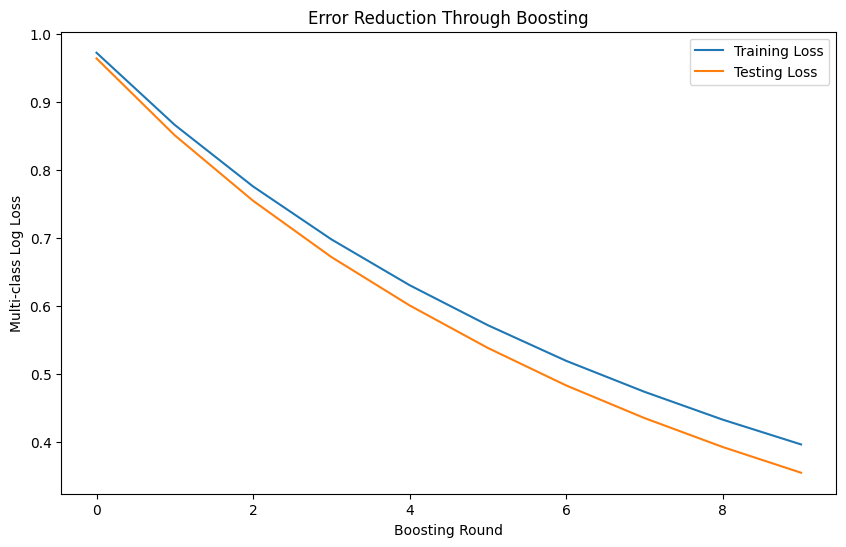


Feature Importances (based on information gain):
             feature  importance
1  petal length (cm)   10.519938
2   petal width (cm)    5.417366
0  sepal length (cm)    0.233651

Prediction evolution for first test sample:
Tree	Class 0	Class 1	Class 2
1	0.309	0.381	0.309
2	0.286	0.427	0.287
3	0.265	0.470	0.265
4	0.244	0.511	0.245
5	0.225	0.549	0.226
6	0.207	0.585	0.208
7	0.190	0.619	0.191
8	0.175	0.649	0.176
9	0.160	0.679	0.161
10	0.147	0.706	0.147


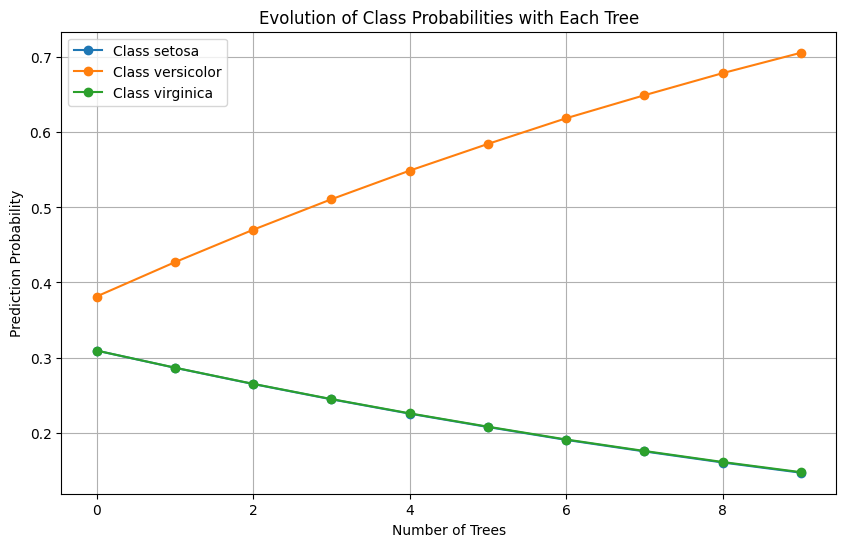

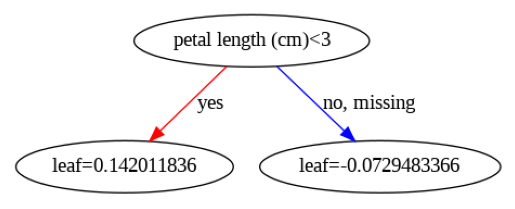

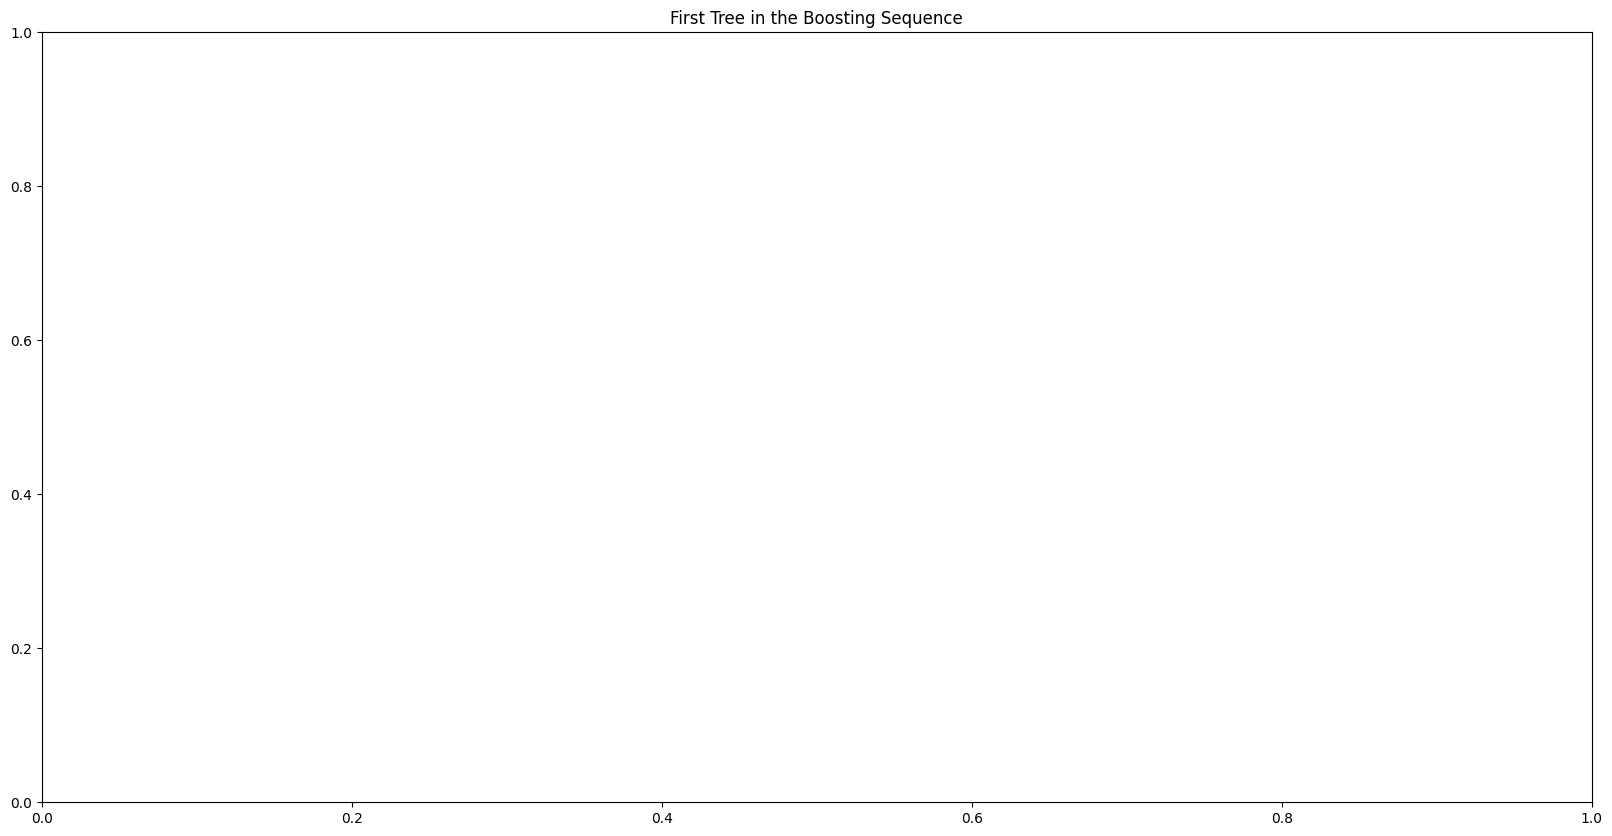


Final Model Accuracy: 1.000


In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and prepare our data
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to XGBoost's optimized DMatrix format
# This is important for efficient training and prediction
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define model parameters
params = {
    'max_depth': 3,
    'learning_rate': 0.1,
    'objective': 'multi:softprob',  # For multi-class probability predictions
    'num_class': 3,                 # We have three iris classes
    'eval_metric': 'mlogloss'       # Logarithmic loss for multi-class
}

# Train the model and track performance
# evals_result will store the error metrics at each boosting round
eval_results = {}
booster = xgb.train(
    params,
    dtrain,
    num_boost_round=10,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    evals_result=eval_results
)

# Visualize error reduction over boosting rounds
plt.figure(figsize=(10, 6))
plt.plot(eval_results['train']['mlogloss'], label='Training Loss')
plt.plot(eval_results['test']['mlogloss'], label='Testing Loss')
plt.xlabel('Boosting Round')
plt.ylabel('Multi-class Log Loss')
plt.title('Error Reduction Through Boosting')
plt.legend()
plt.show()

# Analyze feature importance
importance_dict = booster.get_score(importance_type='gain')
importances = pd.DataFrame({
    'feature': importance_dict.keys(),
    'importance': importance_dict.values()
})
importances = importances.sort_values('importance', ascending=False)
print("\nFeature Importances (based on information gain):")
print(importances)

# Function to get predictions at each boosting stage
def get_stage_predictions(model, data, num_trees):
    """
    Get model predictions after each boosting stage.
    Returns array of shape (num_trees, num_samples, num_classes)
    """
    predictions = []
    for i in range(num_trees):
        # ntree_limit parameter controls how many trees to use for prediction
        pred = model.predict(data, iteration_range=(0, i+1))
        predictions.append(pred)
    return np.array(predictions)

# Get predictions for a single test sample
sample = xgb.DMatrix(X_test.iloc[0:1])
stage_predictions = get_stage_predictions(booster, sample, 10)

print("\nPrediction evolution for first test sample:")
print("Tree\tClass 0\tClass 1\tClass 2")
for i, pred in enumerate(stage_predictions):
    probs = pred[0]  # Get probabilities for first (and only) sample
    print(f"{i+1}\t{probs[0]:.3f}\t{probs[1]:.3f}\t{probs[2]:.3f}")

# Visualize prediction evolution
plt.figure(figsize=(10, 6))
for i in range(3):  # For each class
    plt.plot(stage_predictions[:, 0, i],
             label=f'Class {iris.target_names[i]}',
             marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Prediction Probability')
plt.title('Evolution of Class Probabilities with Each Tree')
plt.legend()
plt.grid(True)
plt.show()

# Visualize the first tree
xgb.plot_tree(booster, num_trees=0)
plt.figure(figsize=(20,10))
plt.title("First Tree in the Boosting Sequence")
plt.show()

# Calculate final model accuracy
final_predictions = booster.predict(dtest)
y_pred = np.argmax(final_predictions, axis=1)
accuracy = (y_pred == y_test).mean()
print(f"\nFinal Model Accuracy: {accuracy:.3f}")